In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv


# flipkart product customer reviews analysis

In [2]:
pip install tweepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
%matplotlib inline
import re
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [4]:
df=pd.read_csv('/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv',nrows=10000)
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [5]:
df.shape

(10000, 6)

In [6]:
df['Rate'].value_counts()

5    6114
4    2053
1     967
3     639
2     227
Name: Rate, dtype: int64

In [7]:
df.isna().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   10000 non-null  object
 1   product_price  10000 non-null  int64 
 2   Rate           10000 non-null  int64 
 3   Review         10000 non-null  object
 4   Summary        10000 non-null  object
 5   Sentiment      10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


# data preprocessing

# clean the data

In [9]:
def cleantext(text):
    # removing @ mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    # removing '#' symbol
    text=re.sub(r'#','',text)
    # removing retweets (RT)
    text=re.sub(r'RT[\s]+','',text)
    # removing the hyper link
    text=re.sub(r'https?:\/\/\S+','',text)
    return text

In [10]:
df['Summary']=df['Summary'].apply(cleantext)
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
9995,CEAT Hitman Full Size Double Blade Poplar Cric...,329,5,awesome,ok,neutral
9996,CEAT Hitman Full Size Double Blade Poplar Cric...,329,5,terrific,awesome,positive
9997,CEAT Hitman Full Size Double Blade Poplar Cric...,329,4,nice product,great product,positive
9998,CEAT Hitman Full Size Double Blade Poplar Cric...,329,4,good choice,nice,positive


# get the polarity

In [11]:
# get the polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
# create new columns 
df['polarity']=df['Summary'].apply(getpolarity)
df

,product_name,product_price,Rate,Review,Summary,Sentiment,polarity
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,0.725000
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,0.666667
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,0.433333
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,-0.455000
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,0.500000
...,...,...,...,...,...,...,...
9995,CEAT Hitman Full Size Double Blade Poplar Cric...,329,5,awesome,ok,neutral,0.500000
9996,CEAT Hitman Full Size Double Blade Poplar Cric...,329,5,terrific,awesome,positive,1.000000
9997,CEAT Hitman Full Size Double Blade Poplar Cric...,329,4,nice product,great product,positive,0.800000
9998,CEAT Hitman Full Size Double Blade Poplar Cric...,329,4,good choice,nice,positive,0.600000


# computing the negative,neuutral,positive analysis

In [12]:
def getanalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'
df['analysis']=df['polarity'].apply(getanalysis)
df

,product_name,product_price,Rate,Review,Summary,Sentiment,polarity,analysis
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,0.725000,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,0.666667,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,0.433333,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,-0.455000,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,0.500000,positive
...,...,...,...,...,...,...,...,...
9995,CEAT Hitman Full Size Double Blade Poplar Cric...,329,5,awesome,ok,neutral,0.500000,positive
9996,CEAT Hitman Full Size Double Blade Poplar Cric...,329,5,terrific,awesome,positive,1.000000,positive
9997,CEAT Hitman Full Size Double Blade Poplar Cric...,329,4,nice product,great product,positive,0.800000,positive
9998,CEAT Hitman Full Size Double Blade Poplar Cric...,329,4,good choice,nice,positive,0.600000,positive


# visualizing the data

<AxesSubplot:xlabel='Rate', ylabel='count'>

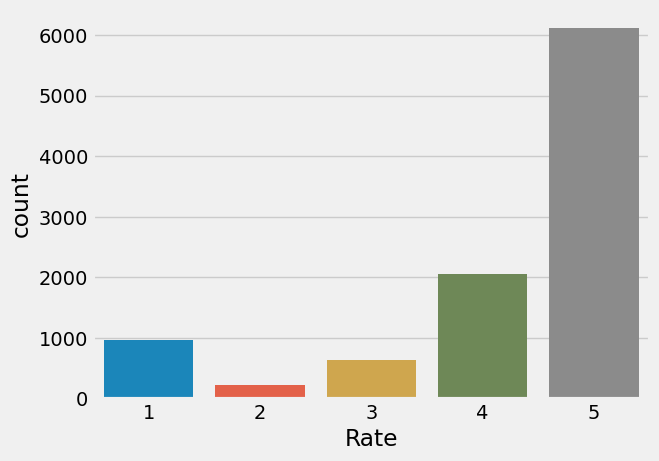

In [13]:
sns.countplot(data=df,x='Rate')

In [14]:
df['Review'].unique()

array(['super!', 'awesome', 'fair', 'useless product',
       'highly recommended', 'nice', 'unsatisfactory', 'worth the money',
       'great product', 'mind-blowing purchase', 'brilliant',
       'classy product', 'must buy!', 'fabulous!', 'worth every penny',
       'just wow!', 'terrific purchase', 'excellent', 'terrific',
       'simply awesome', 'wonderful', 'expected a better product',
       'good quality product', 'decent product', 'very satisfactory',
       'waste of money!', 'good not best', 'does the job', 'pretty good',
       'good cooler', 'worthless', 'worst experience ever!',
       'perfect product!', 'nice product',
       'like an assembled, one can get for 4.5k cheap quality',
       'not good', 'very good', 'slightly disappointed', 'horrible',
       'very poor', 'really nice', 'best in the market!',
       'absolute rubbish!', 'just okay', 'bad quality', 'delightful',
       'value-for-money', 'good choice', 'hated it!', 'good',
       'terrible product', 'not r

# plotting top reviews

In [15]:
df['Review'].value_counts(sort=True)[:20]

wonderful                544
mind-blowing purchase    379
great product            363
worth every penny        353
simply awesome           350
awesome                  347
fabulous!                347
terrific purchase        341
excellent                340
classy product           335
highly recommended       332
terrific                 330
must buy!                329
brilliant                326
perfect product!         319
just wow!                315
super!                   314
best in the market!      312
good quality product     233
really nice              219
Name: Review, dtype: int64

<AxesSubplot:>

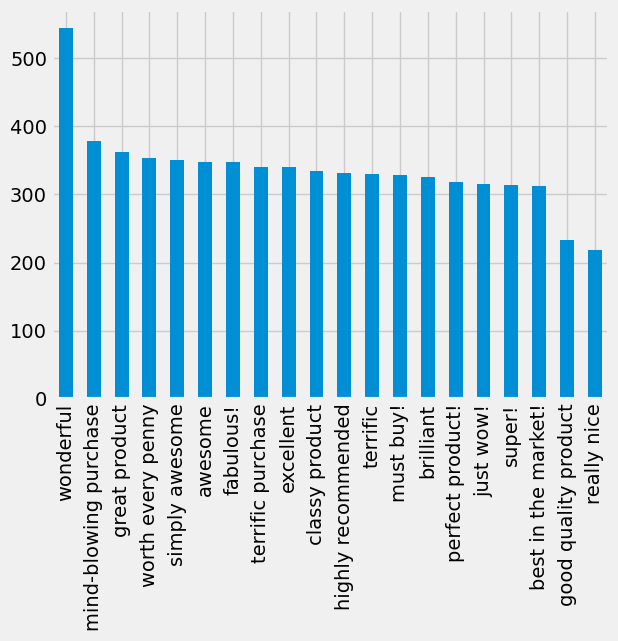

In [16]:
df['Review'].value_counts(sort=True)[:20].plot(kind='bar')

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

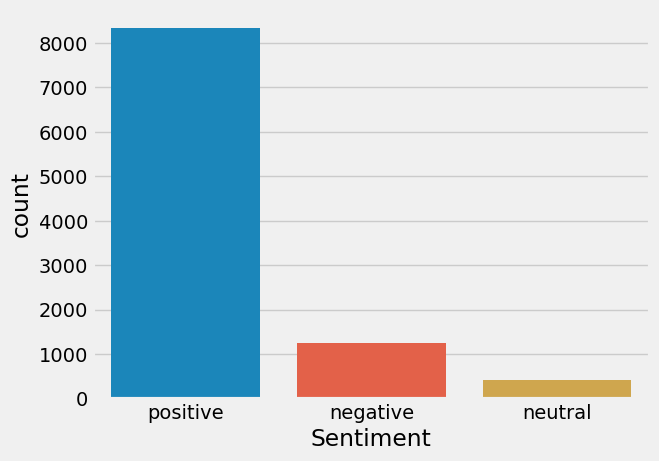

In [17]:
sns.countplot(data=df,x='Sentiment')

# plotting the wordcloud

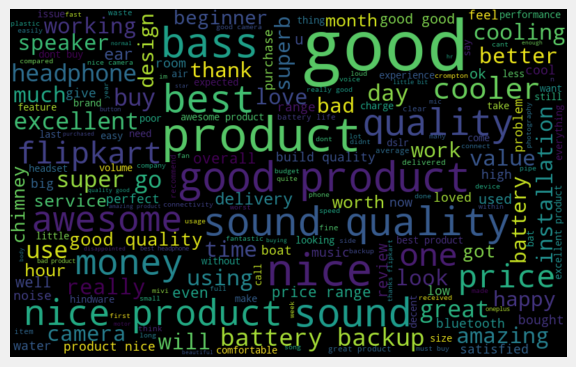

In [18]:
allwords=' '.join(twts for twts in df['Summary'])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(allwords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# plotting the polarity and rate

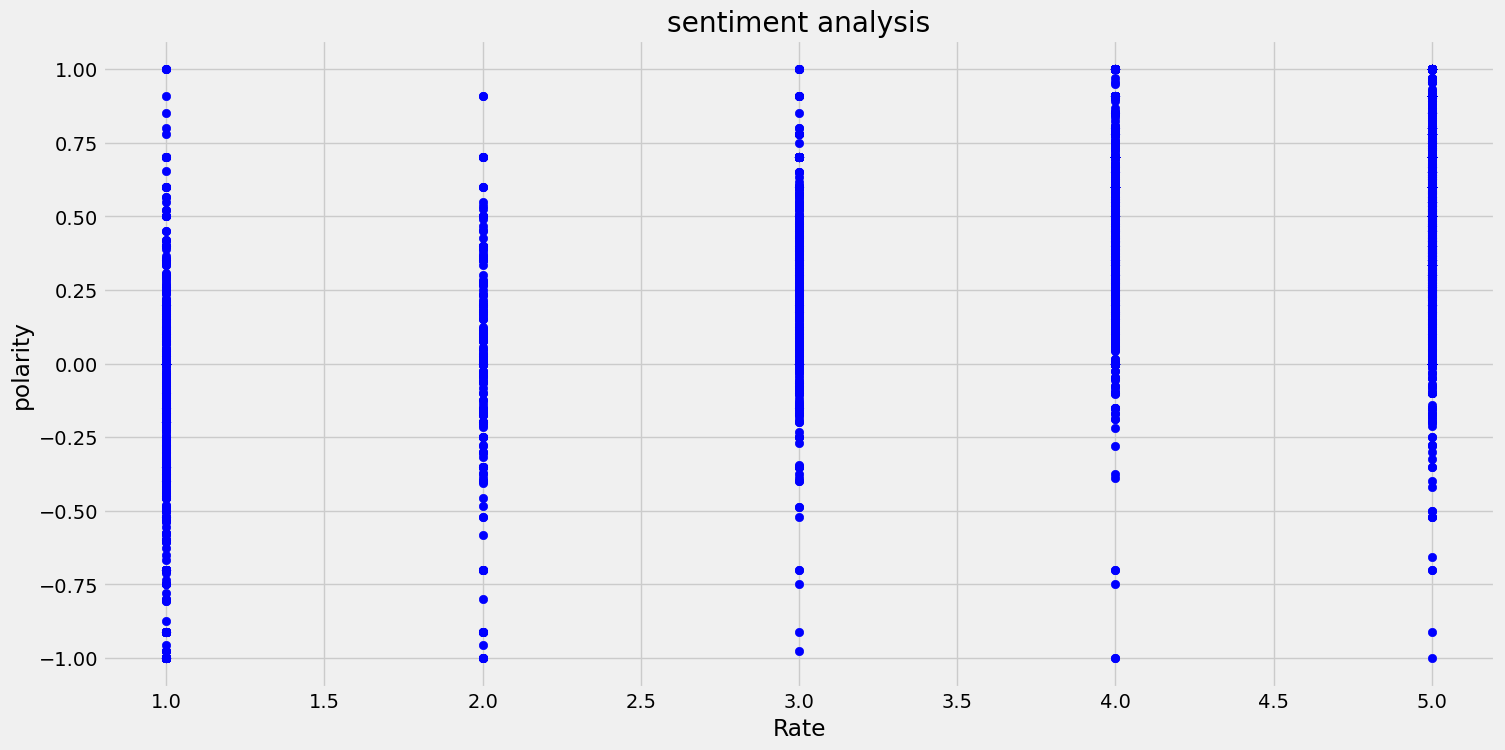

In [19]:
plt.figure(figsize=(16,8))
plt.scatter(df['Rate'],df['polarity'],color='blue')    
plt.title('sentiment analysis')
plt.xlabel('Rate')
plt.ylabel('polarity')
plt.show()

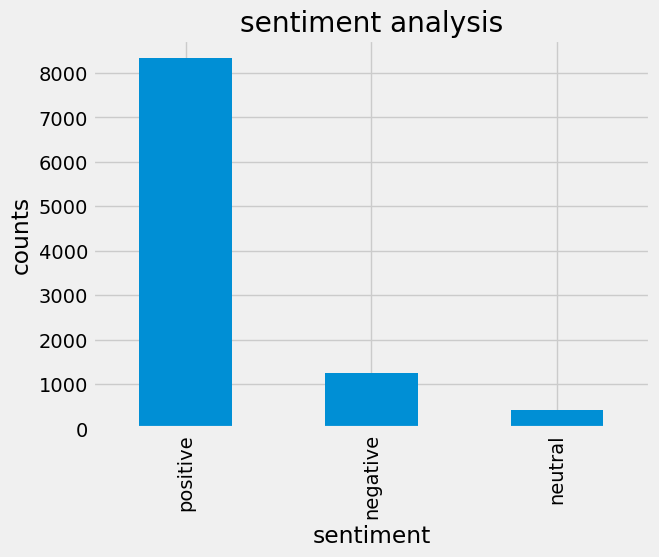

In [20]:
df['Sentiment'].value_counts()
plt.title('sentiment analysis')
plt.xlabel('sentiment')
plt.ylabel('counts')
df['Sentiment'].value_counts().plot(kind='bar')
plt.show()